Elijah Burns <br/>
Phys 434 <br/>
Labs 7 & 8 Double Lab

In [40]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from pyuvdata import UVData

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [41]:
hf = h5py.File('hera_data.uvh5', 'r')
hf.keys()

<KeysViewHDF5 ['Data', 'Header']>

In [42]:
data = np.array(hf.get('Data'))
print(data)

['flags' 'nsamples' 'visdata']


In [43]:
hf.close()

In [44]:
uv = UVData()
uv.read('hera_data.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)


**Initial data axes
Just to be clear, your initial dataset should have the following axes:**

**vab  (each cross-power measurement between antennas  a  and  b . This labelled  vab  because the measurements are called 'visibilities'. A complex quantity in Jansky units.)**

**tn  (each time step, seconds units.)**

**f  (each frequency, in MHz)**

In [45]:
pairs =uv.get_antpairs()

**Signal removal
The data contains both sky signal (good) and contamination (bad). To make a background distribution, we really need to remove the sky signal. The sky signal in this data is very steady in time. Most of the sources are distant radio galaxies who's intensity (brightness) is steady over millions of years, and they move slowly across the sky. But our measurements are every ~10 seconds. So we can remove the astrophysical signals by subtracting neighboring time samples. Many of the contaminants have a lot of variability, either because the brightness is quickly fluctuating or they are rapidly moving on the sky. So this procedure will remove most of the sky signal, but much of the contamination we are looking for will remain.**

**After you do this you sould have the following axes:  vab ,  Δt=tn+1−tn , and  f , and we'll use this for the duration. You will also want to ignore when  a=b  measurements (e.g.  vaa  if they exist).**

In [46]:
times = uv.get_times(50,93)
print(times)

for i in range(19):
    times[i] = times[i+1]-times[i]
    
print(times)

[2459122.34005893 2459122.34017078 2459122.34028263 2459122.34039448
 2459122.34050633 2459122.34061817 2459122.34073002 2459122.34084187
 2459122.34095372 2459122.34106557 2459122.34117741 2459122.34128926
 2459122.34140111 2459122.34151296 2459122.34162481 2459122.34173665
 2459122.3418485  2459122.34196035 2459122.3420722  2459122.34218405]
[1.11848116e-04 1.11848116e-04 1.11848116e-04 1.11848116e-04
 1.11848116e-04 1.11848116e-04 1.11848116e-04 1.11848116e-04
 1.11848116e-04 1.11848116e-04 1.11848116e-04 1.11848116e-04
 1.11848116e-04 1.11848116e-04 1.11848116e-04 1.11848116e-04
 1.11848116e-04 1.11848116e-04 1.11848116e-04 2.45912234e+06]


Notes on time values:
f(del_tn,w) = f(tn,w)-f(tn+1,w)

**Waterfall plots
One particularly usefull plot is a waterfall plot (why it is called this is very obscure), a plot of the power  v  vs. time and frequency. The idea is to have a 2D plot showing the magnitude of the visibility  |vab|  versus time and frequency, with all axes labelled and in the appropriate units.**

In [47]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 50
antenna2 = 93

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [48]:
data = abs(uv.get_data(antenna1,antenna2))
data1 = data[0:19]
#print(abs(data[18]))
#print()
#print(abs(data[17]))
#print()
for i in range(19):
    data1[i] = (data[i+1]-data[i])

#print(data1)

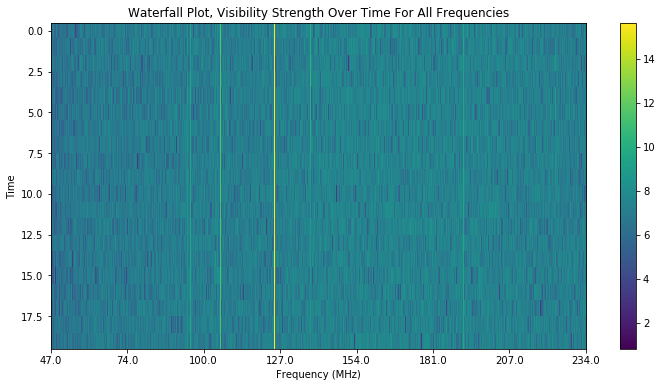

In [49]:
data = abs(uv.get_data(antenna1,antenna2))
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(data)),aspect='auto')
plt.title('Waterfall Plot, Visibility Strength Over Time For All Frequencies')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

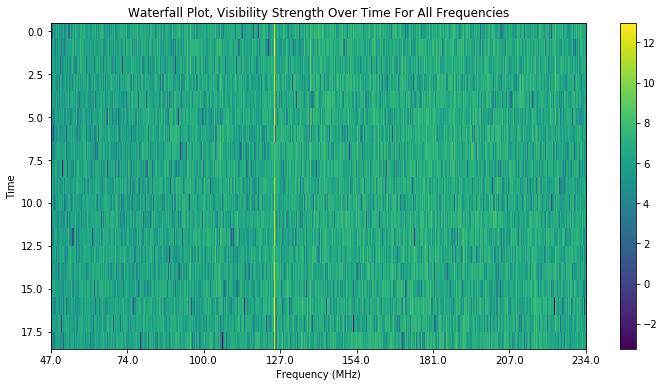

In [50]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(data1)),aspect='auto')
plt.title('Waterfall Plot, Visibility Strength Over Time For All Frequencies')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

**Single antenna pair plots
Pick the visibilities from a single antenna pair. Plot both the waterfall and a histogram of the magnitude of the visibility.**

**Comment on why we are histogramming the magnitude. Describe the basic shape.**

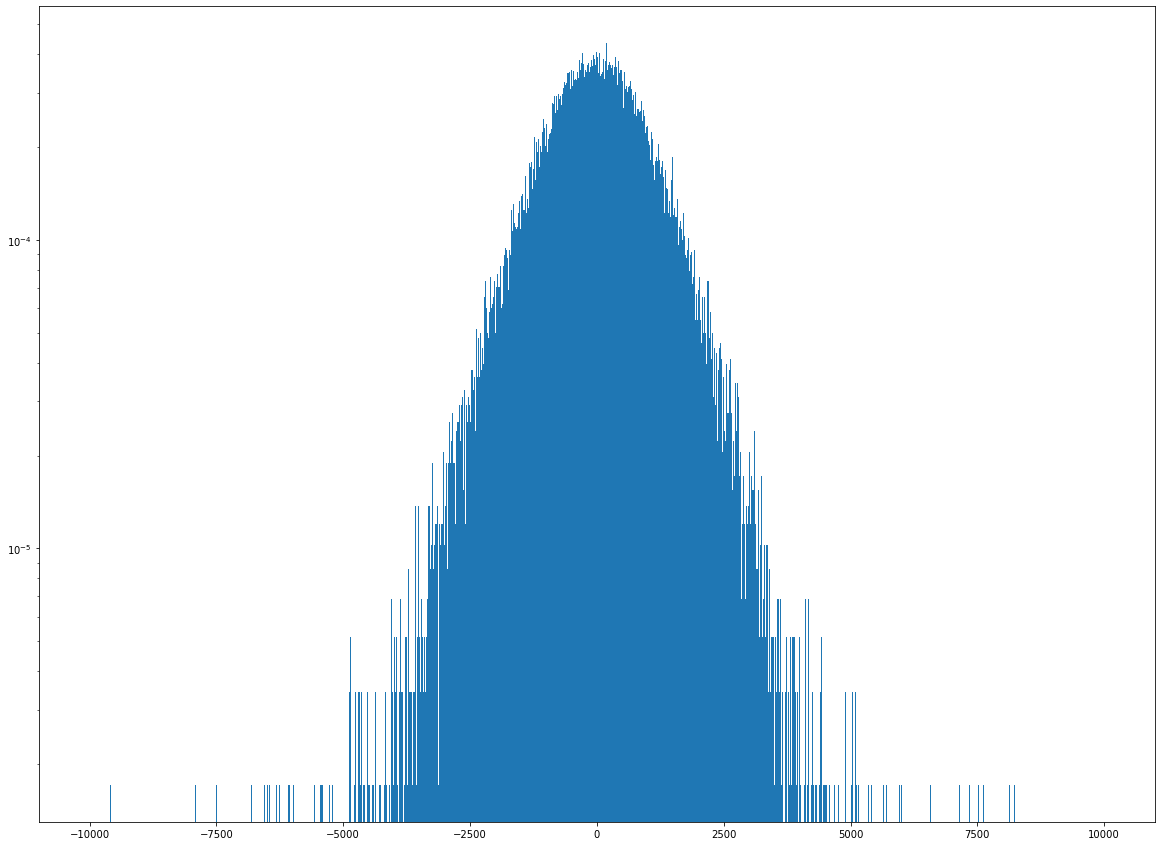

In [51]:
dat1 = []
for i in range(19):
    for j in range(1536):
        dat1.append((data1[i][j]))
#print(max(dat1))


plt.hist(dat1, bins=1000, density = True, range = (-10000,10000))
plt.yscale('log')
plt.show()

**Average visibility plots**

**If a signal comes from far away, we will expect to see it in all antenna pairs. So to increase our sensitivity we can average all of the baseline pairs (make sure to not include the  vaa  values). But because the visibilities are complex, we have to be careful. What we really want is the average of the magnitudes  <|v|>ab , where  a  and  b  cover all values  a≠b .**

**Make the associated waterfall and histogram plots, explore and describe.**

**If your distribution is not centered at zero it may be useful to subtract the average value. If you go down this road, explore whether you want to subtract the global average, or an average per frequency or per time.**

In [52]:
pairs = uv.get_antpairs()
#this is a good start on creating a 3D array of visibility values for all antenna pairs (except when a=a)
#just make a loop, then I think it will be pretty easy from there...?
data = abs(uv.get_data(1,14))
data1 = abs(uv.get_data(1,23))
data2 = abs(uv.get_data(1,26))
print(data[0])
print()
print(data1[0])
tot_dat = np.dstack((data,data1,data2))
print(np.average(tot_dat[0][0]))

[64803.59979199 65164.85913435 66729.18121782 ... 10527.1622482
 14189.1412707  18507.63934163]

[2066.72542927  504.87424177  636.39767441 ...  604.08774197 1190.33482684
 2836.365456  ]
32014.15075353647


In [53]:
total_dat = []
for i in range(666):
    temp = []
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    if ant1 == ant2:
        continue
    data = abs(uv.get_data(ant1,ant2))
    temp = data[0:19]
    for j in range(19):
        temp[j] = (data[j+1]-data[j])
    total_dat.append(temp)

In [54]:
total_dat1 = np.average(total_dat, axis=0)

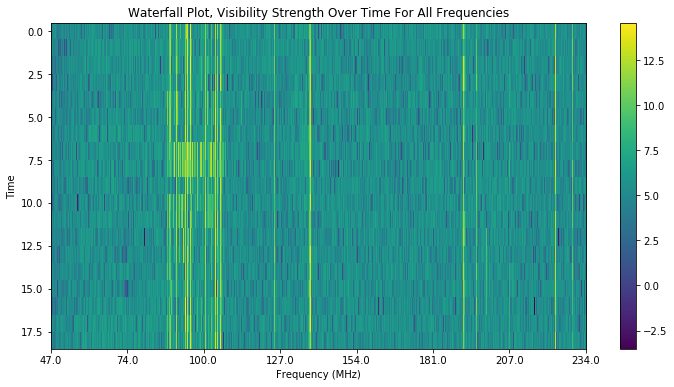

In [55]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(total_dat1)),aspect='auto')
plt.title('Waterfall Plot, Visibility Strength Over Time For All Frequencies')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

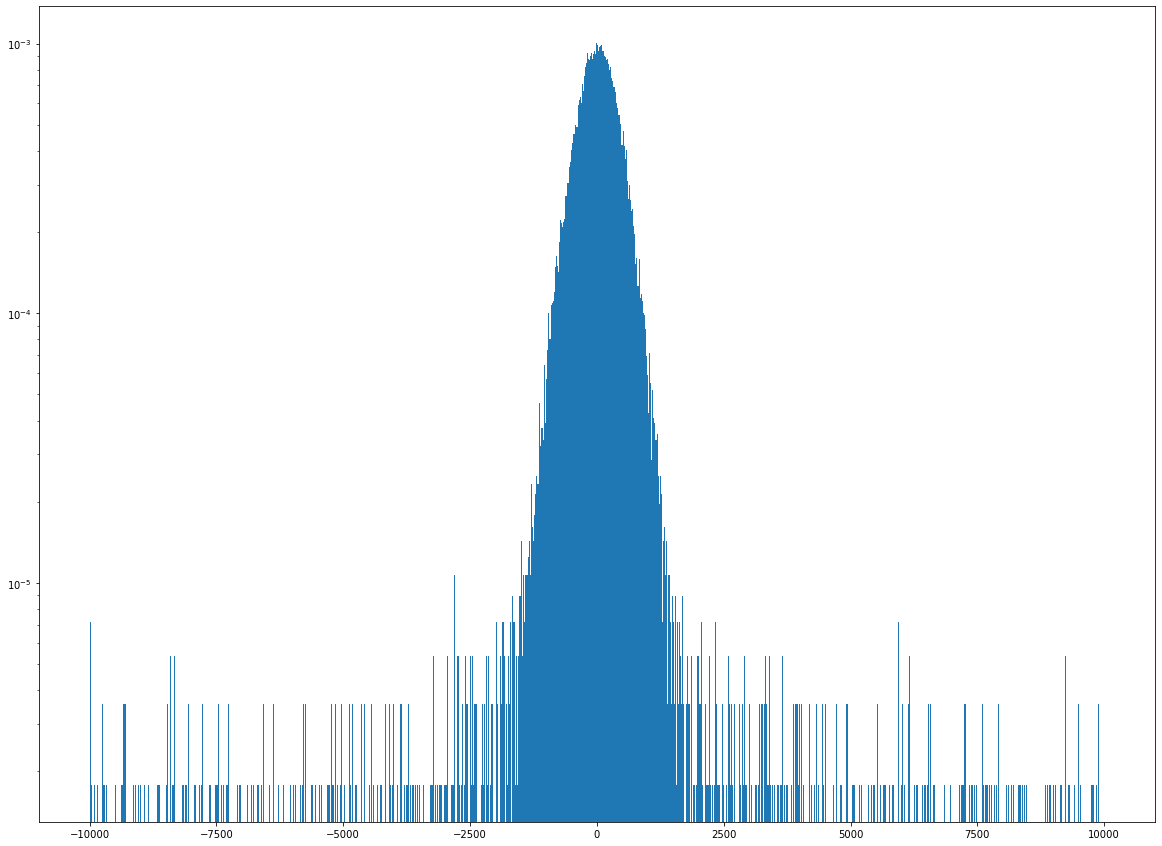

In [56]:
newlist = []
for i in range(19):
    for j in range(1536):
        newlist.append((total_dat1[i][j]))


plt.hist(newlist, bins=1000, density = True, range = (-10000,10000))
plt.yscale('log')
plt.show()

**Feature exploration**

**Describe the features you are seeing as accurately as you can. For some of the data files the following might be helpful https://www.ee.co.za/wp-content/uploads/2015/03/csir-035-02-2015_.jpg**

**Jackknife plots
You may be seeing features already, but there may be features that are still below the level you can see by eye. For this we will need a jackknife test. The steps to any jackknife test are:**

**a) Come up with a concern (state clearly)**

**b) Identify a data cut, where if the concern is true the contamination should appear in one data set but not the other.**

**c) Calculate the histograms for each dataset, including the error bars on the histogram. Plot the histograms.**

**d) For the actual jackknife, subtract the histograms and see whether they are consistent to within the expected error (note the errors on the difference are not identical to the errors on each histogram individually.).**

**Perform a jackknife test or two. Clearly describe whether the jackknife passed (statistically identical) or failed (there is a difference), and what this means about your initial concern in part a).**

Jackknife Part a): <br/>
Concern: very noisy contaminated data from 80 to 110 MHz
<br/>
<br/>
Jackknife Part b): <br/>
Cut all values there


Identify concern, make data cut around that region
Start with frequency, assume problem parts are within first third of time, take that chunk of data, take all frequencies, make histogram with error bars, and another hist of remaining data


In [57]:
#freq indices: 271, 517

#making the cuts (still trying to get these cuts figured out all the way)

cut_total_dat = []
for i in range(666):
    temp1 = []
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    if ant1 == ant2:
        continue
    data5 = abs(uv.get_data(ant1,ant2))
    temp1 = data5[0:19]
    for j in range(19):
        temp1[j] = (data5[j+1]-data5[j])
    cut_total_dat.append(temp1)

In [58]:
cut_total_dat1 = np.average(cut_total_dat, axis=0)

**Data cuts**

**Based on your identified features and jackknife tests, come up with a set of cuts to remove contaminated data.**

**After your cuts, recalculate the average visibility histogram, and compare it to what you had before.**

**If you had a candidate signal in this space, what is the significance of your detection before and after removing the contamination? Discuss in detail. This is the key step in the entire course, so really think about it. Normally we'd want to include as much data as possible to increase sensitivity, but here we are choosing to remove data. Why?**